<a href="https://colab.research.google.com/github/Vijaypurushoth988373/-DW12_task_7/blob/main/Task_7_Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
                 names = ['Id number','RI(refractive index)','Na(Sodium)','Mg(Magnesium)','Al(Aluminum)','Si(Silicon)','K(Potassium)','Ca(Calcium)','Ba(Barium)','Fe(Iron)','Type of glass'])

In [ ]:
df.head()

,Id number,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ca(Calcium),Ba(Barium),Fe(Iron),Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## EDA

In [ ]:
df.shape

(214, 11)

In [ ]:
df.describe()

,Id number,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ca(Calcium),Ba(Barium),Fe(Iron),Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id number             214 non-null    int64  
 1   RI(refractive index)  214 non-null    float64
 2   Na(Sodium)            214 non-null    float64
 3   Mg(Magnesium)         214 non-null    float64
 4   Al(Aluminum)          214 non-null    float64
 5   Si(Silicon)           214 non-null    float64
 6   K(Potassium)          214 non-null    float64
 7   Ca(Calcium)           214 non-null    float64
 8   Ba(Barium)            214 non-null    float64
 9   Fe(Iron)              214 non-null    float64
 10  Type of glass         214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


This is no missing values in the dataset

# Checking for Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


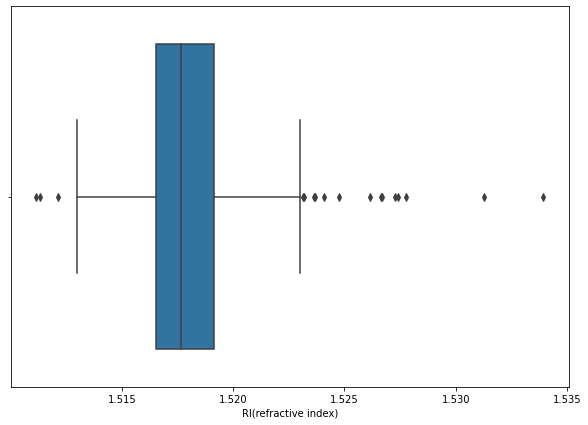

In [ ]:
import seaborn as sns
fig = plt.figure(figsize =(10, 7))

# Creating plot
sns.boxplot(df['RI(refractive index)'])

Finding the IQR

In [ ]:
percentile25 = df['RI(refractive index)'].quantile(0.25)
percentile75 = df['RI(refractive index)'].quantile(0.75)
iqr = percentile75 - percentile25

Finding upper and lower limit

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

Finding the Outliers

In [ ]:
df[df['RI(refractive index)'] > upper_limit]
df[df['RI(refractive index)'] < lower_limit]

,Id number,RI(refractive index),Na(Sodium),Mg(Magnesium),Al(Aluminum),Si(Silicon),K(Potassium),Ca(Calcium),Ba(Barium),Fe(Iron),Type of glass
56,57,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
185,186,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7


Trimming

In [ ]:
new_df = df[df['RI(refractive index)'] < upper_limit]
new_df.shape

(200, 11)

Compare the plots after trimming

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

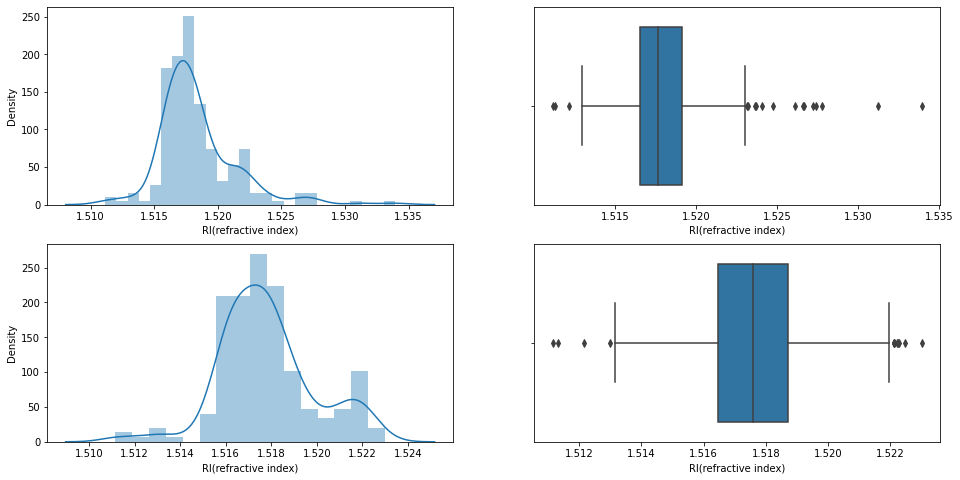

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['RI(refractive index)'])
plt.subplot(2,2,2)
sns.boxplot(df['RI(refractive index)'])
plt.subplot(2,2,3)
sns.distplot(new_df['RI(refractive index)'])
plt.subplot(2,2,4)
sns.boxplot(new_df['RI(refractive index)'])
plt.show()

Capping

In [ ]:
new_df_cap = df.copy()
new_df_cap['RI(refractive index)'] = np.where(
    new_df_cap['RI(refractive index)'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['RI(refractive index)'] < lower_limit,
        lower_limit,
        new_df_cap['RI(refractive index)']
    )
)

Compare the plots after capping

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

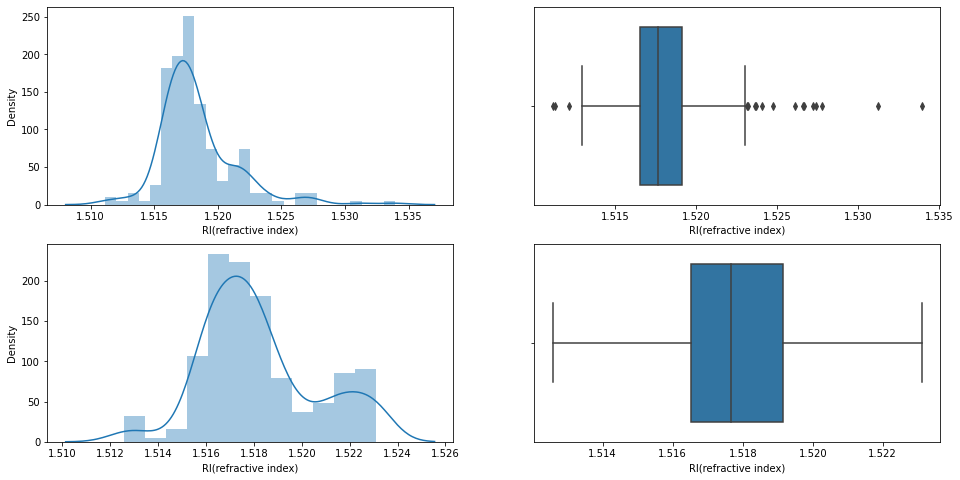

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['RI(refractive index)'])
plt.subplot(2,2,2)
sns.boxplot(df['RI(refractive index)'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['RI(refractive index)'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['RI(refractive index)'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

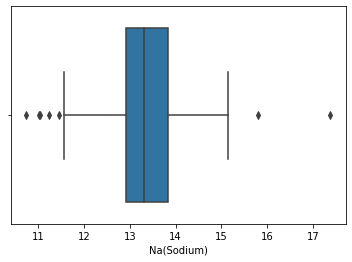

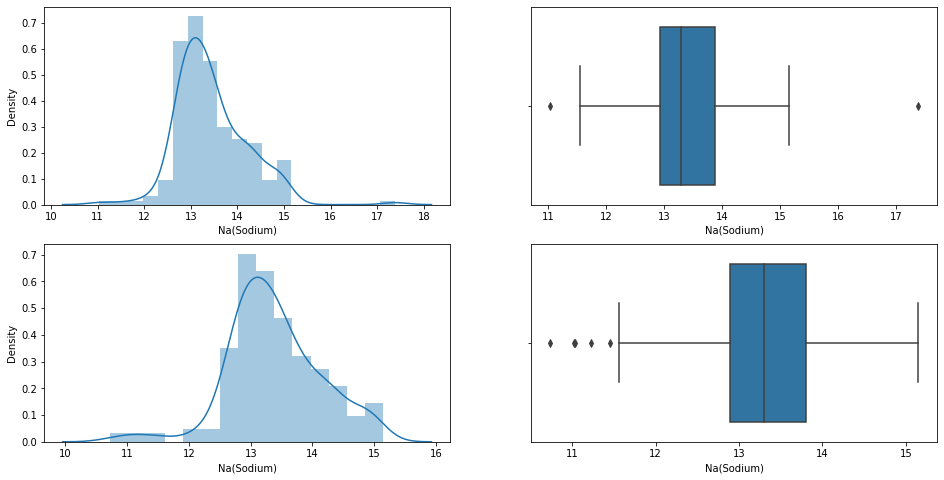

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

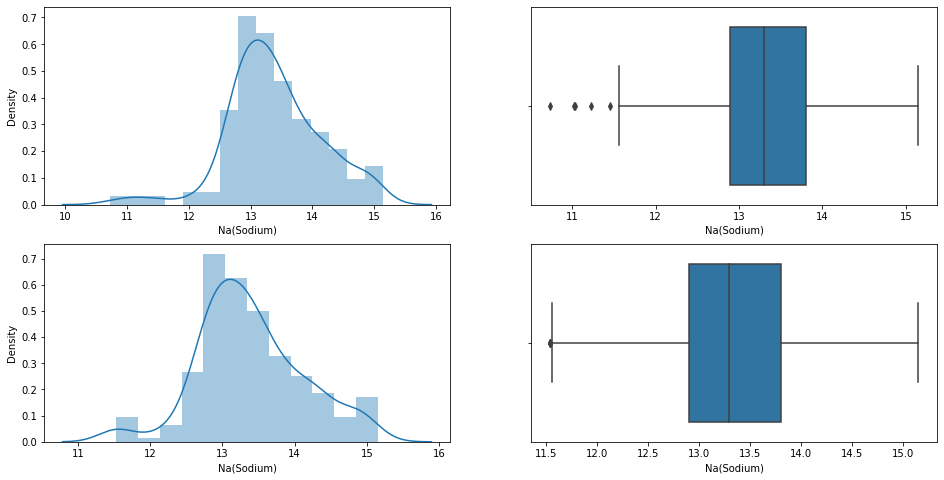

In [ ]:
# Creating plot
sns.boxplot(df['Na(Sodium)'])
percentile25 = df['Na(Sodium)'].quantile(0.25)
percentile75 = df['Na(Sodium)'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df[df['Na(Sodium)'] > upper_limit]
df[df['Na(Sodium)'] < lower_limit]
new_df1 = df[df['Na(Sodium)'] < upper_limit]
new_df1.shape
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df['Na(Sodium)'])
plt.subplot(2,2,2)
sns.boxplot(new_df['Na(Sodium)'])
plt.subplot(2,2,3)
sns.distplot(new_df1['Na(Sodium)'])
plt.subplot(2,2,4)
sns.boxplot(new_df1['Na(Sodium)'])
plt.show()
new_df_cap1 = new_df1.copy()
new_df_cap1['Na(Sodium)'] = np.where(
    new_df_cap1['Na(Sodium)'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap1['Na(Sodium)'] < lower_limit,
        lower_limit,
        new_df_cap1['Na(Sodium)']
    )
)
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_df1['Na(Sodium)'])
plt.subplot(2,2,2)
sns.boxplot(new_df1['Na(Sodium)'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap1['Na(Sodium)'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap1['Na(Sodium)'])
plt.show()

In [ ]:
new_df_cap1.shape

(212, 11)

In [ ]:
X = new_df_cap1.iloc[:, :-1].values
y = new_df_cap1.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K-NN model on the Training set (Euclidean Distance)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0  0  0  0]
 [ 1 20  1  0  0  0]
 [ 0  4  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  8]]


0.8679245283018868

## Training the K-NN model on the Training set (Manhattan Distance)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(p=1)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[13  0  0  0  0  0]
 [ 1 19  1  1  0  0]
 [ 0  2  3  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  8]]


0.8867924528301887

# The Accuracy Score of Euclidean Distance is 86.79 %.
# The Accuracy Score of Manhattan Distance is 88.67 %.